In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from collections import Counter
from datetime import datetime
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# these three line import for Choropleth Maps
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()

#set up everything so that the figures show up in the notebook
init_notebook_mode(connected=True) 


df1 = pd.DataFrame.from_csv('Carsharing/OPENDATA_BOOKING_CARSHARING.csv', index_col=None, sep=";")
df3 = pd.DataFrame.from_csv('Carsharing/OPENDATA_VEHICLE_CARSHARING.csv', index_col=None, sep=";")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
df1.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN


In [3]:
df3.head()

,VEHICLE_HAL_ID,VEHICLE_MODEL_TYPE,VEHICLE_MANUFACTURER_NAME,VEHICLE_MODEL_NAME,VEHICLE_TYPE_NAME,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,OWNERSHIP_TYPE,CAPACITY_AMOUNT,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
0,143031,Auto,Ford,Transit,"2,2 Diesel 63kW !! kein Radio !!",WF0XXXBDFX8R74238,F-R 8018,NaN,63,Diesel,Langzeitmiete,60 l,NaN,Flinkster (Endkd.),DB Fuhrpark
1,146501,Auto,MCC,E-Smart,E-Smart 30 kW,WME4513911K386156,B-SB 4460,NaN,30,Strom,Langzeitmiete,NaN,NaN,Flinkster (Endkd.),DB Fuhrpark
2,147314,Auto,Ford,Focus,"1,6 Diesel 80kW NAVI",WF0SXXGCDSAA82712,F-R 8794,NaN,80,Diesel,Langzeitmiete,52 l,NaN,Flinkster (Endkd.),DB Fuhrpark
3,147382,Auto,Opel,Astra,"1,7 Diesel 81kW NAVI",W0L0AHL35B2057645,F-R 8829,NaN,81,Diesel,Langzeitmiete,52 l,NaN,Flinkster (Endkd.),DB Fuhrpark
4,147392,Auto,MCC,E-Smart,E-Smart 30 kW,WME4513911K448772,HH-EM 3019,NaN,30,Strom,Langzeitmiete,NaN,NaN,Flinkster (Endkd.),DB Fuhrpark


In [4]:
mergedvehicle =pd.merge(df1,df3, on ='VEHICLE_HAL_ID', how ='inner')
mergedvehicle.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,VIN,REGISTRATION_PLATE,SERIAL_NUMBER,KW,FUEL_TYPE_NAME,OWNERSHIP_TYPE,CAPACITY_AMOUNT,ACCESS_CONTROL_COMPONENT_TYPE,COMPANY,COMPANY_GROUP
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16.0,...,VF7SA9HPKCW560598,F-R 7696,NaN,68,Diesel,Langzeitmiete,45 l,NaN,Flinkster (Endkd.),DB Fuhrpark


In [5]:
mergedvehicle.drop(['CATEGORY_HAL_ID','COMPUTE_EXTRA_BOOKING_FEE','TRAVERSE_USE',
                    'REGISTRATION_PLATE','SERIAL_NUMBER','OWNERSHIP_TYPE','ACCESS_CONTROL_COMPONENT_TYPE',
                    'COMPANY','COMPANY_GROUP','END_RENTAL_ZONE','END_RENTAL_ZONE_HAL_ID',
                    'TECHNICAL_INCOME_CHANNEL','VEHICLE_MODEL_TYPE','VEHICLE_MANUFACTURER_NAME',
                   'VEHICLE_TYPE_NAME','CAPACITY_AMOUNT','VEHICLE_MODEL_NAME','DATE_BOOKING',
                   'VIN','FUEL_TYPE_NAME','KW','RENTAL_ZONE_HAL_SRC','DISTANCE','BOOKING_HAL_ID',
                   'START_RENTAL_ZONE_HAL_ID','START_RENTAL_ZONE'], axis = 1, inplace = True, errors = 'ignore')
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln


In [6]:
mergedvehicle['DATE_FROM']=pd.to_datetime(mergedvehicle['DATE_FROM'])

In [7]:
mergedvehicle['from_year']=mergedvehicle.DATE_FROM.dt.year
mergedvehicle['from_month']=mergedvehicle.DATE_FROM.dt.month
mergedvehicle['from_weekday']=mergedvehicle.DATE_FROM.dt.weekday_name
# You can also do by using lambda function
mergedvehicle['from_hour'] = mergedvehicle['DATE_FROM'].apply(lambda time: time.hour)
mergedvehicle['from_date']=mergedvehicle['DATE_FROM'].apply(lambda time: time.date())
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln,2014,1,Sunday,13,2014-01-12
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln,2014,1,Sunday,14,2014-01-05
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln,2014,3,Sunday,18,2014-03-16
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln,2014,1,Monday,17,2014-01-06
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln,2014,1,Monday,17,2014-01-13


In [8]:
mergedvehicle['vehicleDate'] = mergedvehicle[['VEHICLE_HAL_ID','from_date']].apply(lambda x : '{} / {}'.format(x[0],x[1]), axis=1)
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
0,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-12 13:00:00,2014-01-12 14:30:00,Köln,2014,1,Sunday,13,2014-01-12,150359 / 2014-01-12
1,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-01-05 14:00:00,2014-01-05 15:30:00,Köln,2014,1,Sunday,14,2014-01-05,150359 / 2014-01-05
2,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2014-03-16 18:15:00,2014-03-16 19:30:00,Köln,2014,3,Sunday,18,2014-03-16,150359 / 2014-03-16
3,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-06 17:00:00,2014-01-06 23:45:00,Köln,2014,1,Monday,17,2014-01-06,150359 / 2014-01-06
4,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2014-01-13 17:00:00,2014-01-13 23:45:00,Köln,2014,1,Monday,17,2014-01-13,150359 / 2014-01-13


In [9]:
mergedvehicle.index = pd.PeriodIndex(mergedvehicle.from_date, freq='D')

In [10]:
mergedvehicle = mergedvehicle.sort_values(by ='from_date')
mergedvehicle.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-01,149195,8D61A183DE42905F733B36AEF17A933986FA4FFC,2014-01-01 11:00:00,2014-01-01 13:45:00,Köln,2014,1,Wednesday,11,2014-01-01,149195 / 2014-01-01
2014-01-01,148693,5F50A888063B0FEF9C549C86B252D7140C5BD701,2014-01-01 14:30:00,2014-01-01 21:00:00,Köln,2014,1,Wednesday,14,2014-01-01,148693 / 2014-01-01
2014-01-01,148675,AD46053C12E3BFA57534DECB7A400AECAAF9F332,2014-01-01 18:15:00,2014-01-02 01:30:00,Berlin,2014,1,Wednesday,18,2014-01-01,148675 / 2014-01-01
2014-01-01,148675,EA3F9BA222BED9137A3F4A0A684FD27BD9048AAC,2014-01-01 15:00:00,2014-01-01 17:00:00,Berlin,2014,1,Wednesday,15,2014-01-01,148675 / 2014-01-01
2014-01-01,148693,2DD91607E6D9BE3AD843E4EFA55A6AF17029A9AB,2014-01-01 12:15:00,2014-01-01 14:15:00,Köln,2014,1,Wednesday,12,2014-01-01,148693 / 2014-01-01


In [11]:
mergedvehiclecitymunchen = mergedvehicle.loc[mergedvehicle.CITY_RENTAL_ZONE == "München"]

#mergedvehiclecitymunchen= mergedvehicle
mergedvehiclecitymunchen.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-01,154672,0EF6727387D501F39ACEFCE2A5E9367E7B2C0A49,2014-01-01 10:00:00,2014-01-01 19:00:00,München,2014,1,Wednesday,10,2014-01-01,154672 / 2014-01-01
2014-01-01,150225,06F64E4A7C54FC617589678DABD19EA816F606B6,2014-01-01 09:00:00,2014-01-01 22:00:00,München,2014,1,Wednesday,9,2014-01-01,150225 / 2014-01-01
2014-01-01,154725,4551F71957A7A5E0B47C1C9976F6599666BF906B,2014-01-01 17:00:00,2014-01-01 22:45:00,München,2014,1,Wednesday,17,2014-01-01,154725 / 2014-01-01
2014-01-01,154648,1AAB03B481936BDEF0FCCE07520E949721414225,2014-01-01 11:00:00,2014-01-01 17:15:00,München,2014,1,Wednesday,11,2014-01-01,154648 / 2014-01-01
2014-01-01,150789,3A4B62BB64A4C757A49D749C9A980FCD44D73FE0,2014-01-01 16:00:00,2014-01-01 23:30:00,München,2014,1,Wednesday,16,2014-01-01,150789 / 2014-01-01


In [12]:
mergedvehiclecitymunchenmonth= mergedvehiclecitymunchen#[mergedvehiclecitymunchen2016.from_year == 2016]

mergedvehiclecitymunchenmonth.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2017-05-16,170513,4E9A90F3EB4A5A4285E42FF02F4B0344F5ED72D7,2017-05-16 07:00:00,2017-05-16 23:00:00,München,2017,5,Tuesday,7,2017-05-16,170513 / 2017-05-16
2017-05-16,173517,1A5C8B89D697D134FC114EF68D35D1B1D5A724BB,2017-05-16 08:30:00,2017-05-16 12:30:00,München,2017,5,Tuesday,8,2017-05-16,173517 / 2017-05-16
2017-05-16,173542,5438D8AA146DF7710B61692BABD39BDEDB539D94,2017-05-16 08:30:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,173542 / 2017-05-16
2017-05-16,174215,2DC80C83FB638F31A6905AF0B68EF1CEDB73B18C,2017-05-16 08:00:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,174215 / 2017-05-16
2017-05-16,167786,06EBEE3B0F8AA11CCE044D931603C7B5D1B3881B,2017-05-16 05:00:00,2017-05-16 05:15:00,München,2017,5,Tuesday,5,2017-05-16,167786 / 2017-05-16


In [13]:

january = mergedvehiclecitymunchenmonth[(mergedvehiclecitymunchenmonth.index >= '2014-01-01')
                                            & (mergedvehiclecitymunchenmonth.index < '2017-05-30')]
january.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2017-05-16,170513,4E9A90F3EB4A5A4285E42FF02F4B0344F5ED72D7,2017-05-16 07:00:00,2017-05-16 23:00:00,München,2017,5,Tuesday,7,2017-05-16,170513 / 2017-05-16
2017-05-16,173517,1A5C8B89D697D134FC114EF68D35D1B1D5A724BB,2017-05-16 08:30:00,2017-05-16 12:30:00,München,2017,5,Tuesday,8,2017-05-16,173517 / 2017-05-16
2017-05-16,173542,5438D8AA146DF7710B61692BABD39BDEDB539D94,2017-05-16 08:30:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,173542 / 2017-05-16
2017-05-16,174215,2DC80C83FB638F31A6905AF0B68EF1CEDB73B18C,2017-05-16 08:00:00,2017-05-16 18:00:00,München,2017,5,Tuesday,8,2017-05-16,174215 / 2017-05-16
2017-05-16,167786,06EBEE3B0F8AA11CCE044D931603C7B5D1B3881B,2017-05-16 05:00:00,2017-05-16 05:15:00,München,2017,5,Tuesday,5,2017-05-16,167786 / 2017-05-16


In [14]:
a=january.sort_values('vehicleDate', ascending=False).drop_duplicates(['vehicleDate']) 
a.tail()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,from_date,vehicleDate
from_date,,,,,,,,,,,
2014-01-09,148191,DBC3EF4F1FD6B33CB67FDFF4820D2A01A7AC743A,2014-01-09 12:30:00,2014-01-09 13:15:00,München,2014,1,Thursday,12,2014-01-09,148191 / 2014-01-09
2014-01-08,148191,40CB090920B477F668E745ED62359AF72B99CB09,2014-01-08 18:00:00,2014-01-08 19:45:00,München,2014,1,Wednesday,18,2014-01-08,148191 / 2014-01-08
2014-01-06,148191,40CB090920B477F668E745ED62359AF72B99CB09,2014-01-06 13:30:00,2014-01-06 16:45:00,München,2014,1,Monday,13,2014-01-06,148191 / 2014-01-06
2014-01-03,148191,4BA53976EAF81E462CB28E108B6236D5FB70B410,2014-01-03 08:00:00,2014-01-05 18:30:00,München,2014,1,Friday,8,2014-01-03,148191 / 2014-01-03
2014-01-02,148191,A47B5E7AD330DB960593A34C4EEE0D43EE2DEDAF,2014-01-02 08:00:00,2014-01-02 13:00:00,München,2014,1,Thursday,8,2014-01-02,148191 / 2014-01-02


In [15]:
auniquemunich= a.groupby('from_date').count()
auniquemunich['munchencount']=auniquemunich.index
auniquemunich.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,vehicleDate,munchencount
from_date,,,,,,,,,,,
2014-01-01,34,34,34,34,34,34,34,34,34,34,2014-01-01
2014-01-02,50,50,50,50,50,50,50,50,50,50,2014-01-02
2014-01-03,70,70,70,70,70,70,70,70,70,70,2014-01-03
2014-01-04,81,81,81,81,81,81,81,81,81,81,2014-01-04
2014-01-05,54,54,54,54,54,54,54,54,54,54,2014-01-05


In [16]:
auniquemunich.VEHICLE_HAL_ID.iplot( title='Count of Vehicles in Munchen city ')

In [17]:
bycountmunchenmonth1= mergedvehiclecitymunchenmonth.groupby('from_date').count()
bycountmunchenmonth1.head()

,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_FROM,DATE_UNTIL,CITY_RENTAL_ZONE,from_year,from_month,from_weekday,from_hour,vehicleDate
from_date,,,,,,,,,,
2014-01-01,39,39,39,39,39,39,39,39,39,39
2014-01-02,71,71,71,71,71,71,71,71,71,71
2014-01-03,88,88,88,88,88,88,88,88,88,88
2014-01-04,122,122,122,122,122,122,122,122,122,122
2014-01-05,64,64,64,64,64,64,64,64,64,64


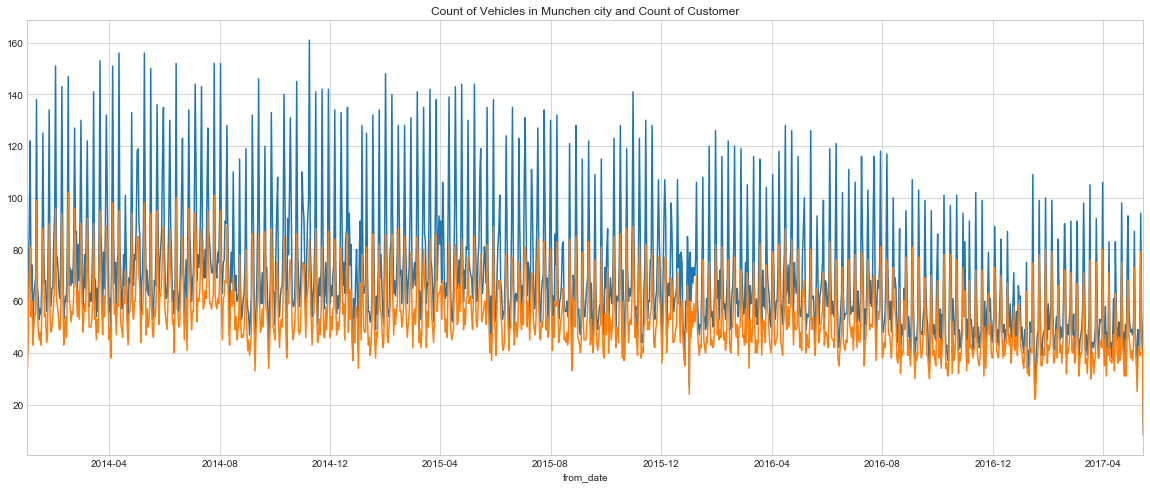

In [18]:
plt.figure(figsize=(20,8))
bycountmunchenmonth1.VEHICLE_HAL_ID.plot( title='Count of Vehicles  booking times in Munchen city')
auniquemunich.VEHICLE_HAL_ID.plot( title='Count of Vehicles in Munchen city and Count of Customer')

In [19]:
auniquemunich.drop(['DATE_FROM', 'CUSTOMER_HAL_ID', 'CITY_RENTAL_ZONE','from_year', 'DATE_UNTIL','from_weekday',
                    'from_hour'], axis = 1, inplace = True, errors = 'ignore')
auniquemunich.head()

,VEHICLE_HAL_ID,from_month,vehicleDate,munchencount
from_date,,,,
2014-01-01,34,34,34,2014-01-01
2014-01-02,50,50,50,2014-01-02
2014-01-03,70,70,70,2014-01-03
2014-01-04,81,81,81,2014-01-04
2014-01-05,54,54,54,2014-01-05


In [20]:
auniquemunich['VEHICLE_HAL_ID_LOG'] = np.log(auniquemunich.VEHICLE_HAL_ID)
auniquemunich.head()

,VEHICLE_HAL_ID,from_month,vehicleDate,munchencount,VEHICLE_HAL_ID_LOG
from_date,,,,,
2014-01-01,34,34,34,2014-01-01,3.526361
2014-01-02,50,50,50,2014-01-02,3.912023
2014-01-03,70,70,70,2014-01-03,4.248495
2014-01-04,81,81,81,2014-01-04,4.394449
2014-01-05,54,54,54,2014-01-05,3.988984


In [21]:
auniquemunich["VEHICLE_HAL_ID_LOGShift"] = auniquemunich.VEHICLE_HAL_ID_LOG.shift()
auniquemunich.head()

,VEHICLE_HAL_ID,from_month,vehicleDate,munchencount,VEHICLE_HAL_ID_LOG,VEHICLE_HAL_ID_LOGShift
from_date,,,,,,
2014-01-01,34,34,34,2014-01-01,3.526361,NaN
2014-01-02,50,50,50,2014-01-02,3.912023,3.526361
2014-01-03,70,70,70,2014-01-03,4.248495,3.912023
2014-01-04,81,81,81,2014-01-04,4.394449,4.248495
2014-01-05,54,54,54,2014-01-05,3.988984,4.394449


In [22]:
auniquemunich["VEHICLE_HAL_ID_LOGDiff"] = auniquemunich.VEHICLE_HAL_ID_LOG - auniquemunich.VEHICLE_HAL_ID_LOGShift

In [23]:
auniquemunich['VEHICLE_HAL_ID_LOGMA'] = pd.rolling_mean(auniquemunich.VEHICLE_HAL_ID_LOG, window = 12)
auniquemunich.head()

,VEHICLE_HAL_ID,from_month,vehicleDate,munchencount,VEHICLE_HAL_ID_LOG,VEHICLE_HAL_ID_LOGShift,VEHICLE_HAL_ID_LOGDiff,VEHICLE_HAL_ID_LOGMA
from_date,,,,,,,,
2014-01-01,34,34,34,2014-01-01,3.526361,NaN,NaN,NaN
2014-01-02,50,50,50,2014-01-02,3.912023,3.526361,0.385662,NaN
2014-01-03,70,70,70,2014-01-03,4.248495,3.912023,0.336472,NaN
2014-01-04,81,81,81,2014-01-04,4.394449,4.248495,0.145954,NaN
2014-01-05,54,54,54,2014-01-05,3.988984,4.394449,-0.405465,NaN


In [24]:
auniquemunich.dtypes

VEHICLE_HAL_ID               int64
from_month                   int64
vehicleDate                  int64
munchencount                object
VEHICLE_HAL_ID_LOG         float64
VEHICLE_HAL_ID_LOGShift    float64
VEHICLE_HAL_ID_LOGDiff     float64
VEHICLE_HAL_ID_LOGMA       float64
dtype: object

In [25]:
auniquemunich['VEHICLE_HAL_ID']=auniquemunich['VEHICLE_HAL_ID'].astype(float)
auniquemunich.dtypes

VEHICLE_HAL_ID             float64
from_month                   int64
vehicleDate                  int64
munchencount                object
VEHICLE_HAL_ID_LOG         float64
VEHICLE_HAL_ID_LOGShift    float64
VEHICLE_HAL_ID_LOGDiff     float64
VEHICLE_HAL_ID_LOGMA       float64
dtype: object

# ARIMA model

In [26]:
ts = auniquemunich.VEHICLE_HAL_ID_LOG
ts_diff = auniquemunich.VEHICLE_HAL_ID_LOGDiff
ts_diff.dropna(inplace = True)

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
lag_acf = acf(ts_diff, nlags=20)

In [29]:
ACF = pd.Series(lag_acf)

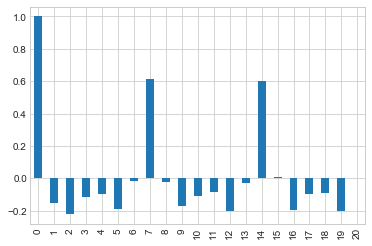

In [30]:
ACF.plot(kind = "bar")

In [31]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

In [32]:
PACF = pd.Series(lag_pacf)

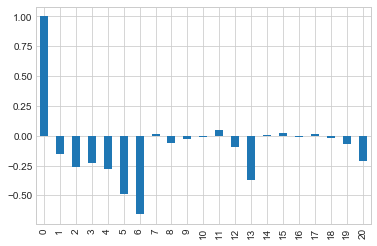

In [33]:
PACF.plot(kind = "bar")

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
#ts_diff.head()

In [36]:
# Running the ARIMA Model(1,0,1)
model_ARIMA = ARIMA(auniquemunich.VEHICLE_HAL_ID, order=(2,0,6))

In [37]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [38]:
#results_ARIMA = model_ARIMA.fit(disp = -1)
results_ARIMA = model_ARIMA.fit()
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:         VEHICLE_HAL_ID   No. Observations:                 1232
Model:                     ARMA(2, 6)   Log Likelihood               -4595.696
Method:                       css-mle   S.D. of innovations             10.067
Date:                Tue, 27 Mar 2018   AIC                           9211.392
Time:                        08:16:14   BIC                           9262.556
Sample:                    01-01-2014   HQIC                          9230.640
                         - 05-16-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   54.6746      0.465    117.544      0.000      53.763      55.586
ar.L1.VEHICLE_HAL_ID     1.2462      0.000   3956.096      0.000       1.246       1.247
ar.L2.VEHICL

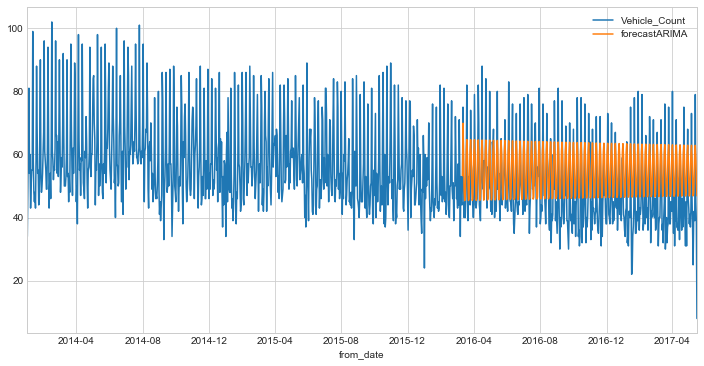

In [39]:
auniquemunich['forecastARIMA'] = results_ARIMA.predict(start = 800, end= 1232, dynamic= True)
auniquemunich['Vehicle_Count']= auniquemunich['VEHICLE_HAL_ID']
auniquemunich[['Vehicle_Count', 'forecastARIMA']].plot(figsize=(12, 6))

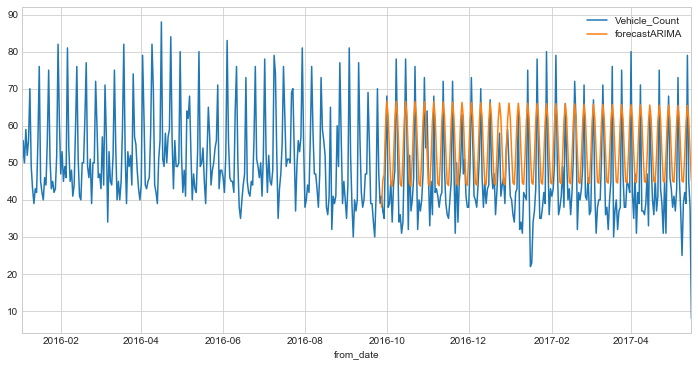

In [40]:
auniquemunich['forecastARIMA'] = results_ARIMA.predict(start = 1000, end = 1500, dynamic= True)  
auniquemunich[['Vehicle_Count', 'forecastARIMA']].ix[-500:].plot(figsize=(12, 6))

In [41]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse


In [42]:
model_mean_RMSE_ARIMA= RMSE(auniquemunich.VEHICLE_HAL_ID, auniquemunich.forecastARIMA)
model_mean_RMSE_ARIMA

13.018864615287384

# SARIMA MODEL

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
auniquemunich.VEHICLE_HAL_ID.iplot( title='VEHICLE count in  Munchen')

In [44]:
from statsmodels.tsa.stattools import adfuller
def adf(ts):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=2)
    rolstd = pd.rolling_std(ts, window=2)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

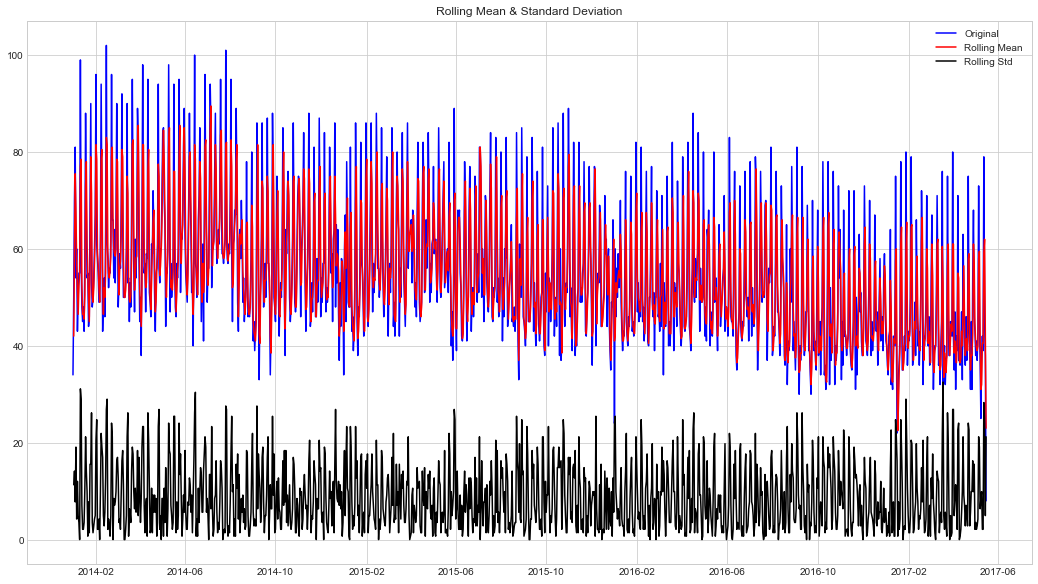

Test Statistic                   -1.511930
p-value                           0.527602
# of Lags Used                   21.000000
Number of Observations Used    1210.000000
Critical Value (1%)              -3.435766
Critical Value (5%)              -2.863932
Critical Value (10%)             -2.568043
dtype: float64

In [45]:
# Test remaining part for Stationary
plt.figure(figsize=(18,10))
ts = auniquemunich.VEHICLE_HAL_ID

ts.dropna(inplace = True)
#ts = bycountmunchen.CUSTOMER_HAL_ID_LOG - bycountmunchen.CUSTOMER_HAL_ID_LOGMA
adf(ts)


In [46]:
auniquemunich["Ride"] = auniquemunich.VEHICLE_HAL_ID_LOG - auniquemunich.VEHICLE_HAL_ID_LOGMA
auniquemunich.head()

,VEHICLE_HAL_ID,from_month,vehicleDate,munchencount,VEHICLE_HAL_ID_LOG,VEHICLE_HAL_ID_LOGShift,VEHICLE_HAL_ID_LOGDiff,VEHICLE_HAL_ID_LOGMA,forecastARIMA,Vehicle_Count,Ride
from_date,,,,,,,,,,,
2014-01-01,34.0,34,34,2014-01-01,3.526361,NaN,NaN,NaN,NaN,34.0,NaN
2014-01-02,50.0,50,50,2014-01-02,3.912023,3.526361,0.385662,NaN,NaN,50.0,NaN
2014-01-03,70.0,70,70,2014-01-03,4.248495,3.912023,0.336472,NaN,NaN,70.0,NaN
2014-01-04,81.0,81,81,2014-01-04,4.394449,4.248495,0.145954,NaN,NaN,81.0,NaN
2014-01-05,54.0,54,54,2014-01-05,3.988984,4.394449,-0.405465,NaN,NaN,54.0,NaN


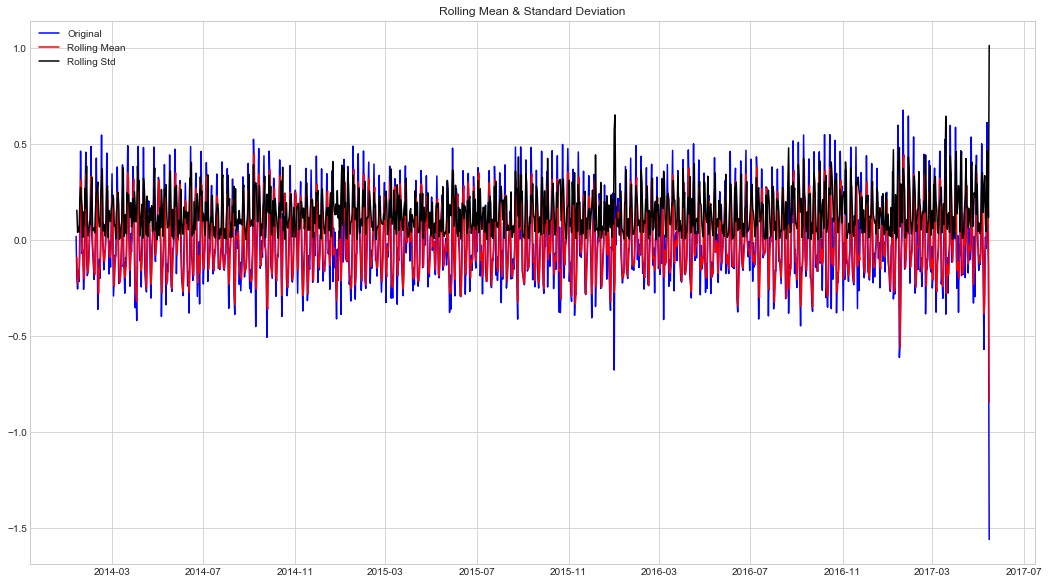

Test Statistic                -8.471786e+00
p-value                        1.470977e-13
# of Lags Used                 2.200000e+01
Number of Observations Used    1.198000e+03
Critical Value (1%)           -3.435820e+00
Critical Value (5%)           -2.863956e+00
Critical Value (10%)          -2.568056e+00
dtype: float64

In [47]:
# Test remaining part for Stationary
plt.figure(figsize=(18,10))
ts = auniquemunich.Ride

ts.dropna(inplace = True)

adf(ts)

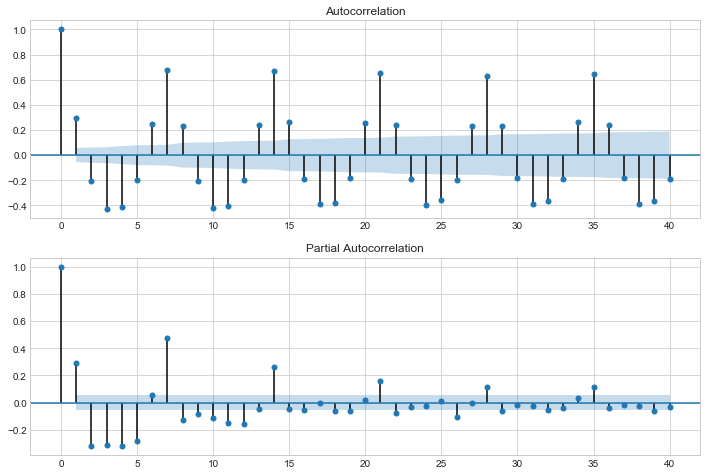

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.iloc[13:], lags=40, ax=ax2)


In [49]:
mod = sm.tsa.statespace.SARIMAX(auniquemunich.VEHICLE_HAL_ID, trend='n', order=(1,1,4), seasonal_order=(2,0,4,12))
results = mod.fit()
print(results.summary())

C:\Users\Surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 Statespace Model Results                                 
Dep. Variable:                     VEHICLE_HAL_ID   No. Observations:                 1232
Model:             SARIMAX(1, 1, 4)x(2, 0, 4, 12)   Log Likelihood               -4548.069
Date:                            Tue, 27 Mar 2018   AIC                           9120.138
Time:                                    08:17:41   BIC                           9181.535
Sample:                                01-01-2014   HQIC                          9143.236
                                     - 05-16-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3906      0.061     -6.411      0.000      -0.510      -0.271
ma.L1         -0.6497      0.055   

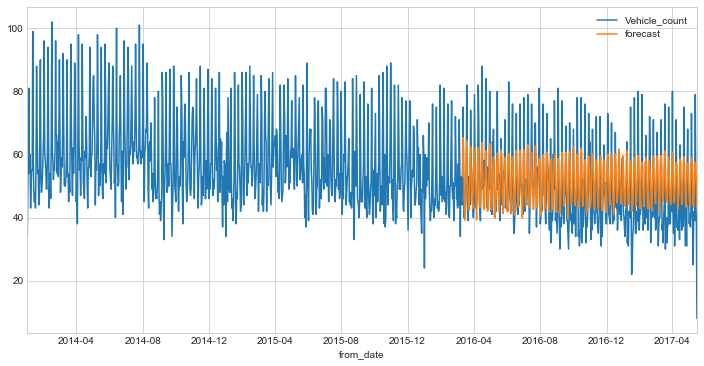

In [50]:
auniquemunich['forecast'] = results.predict(start = 800, end= 1232, dynamic= True)  
auniquemunich['Vehicle_count'] = auniquemunich['VEHICLE_HAL_ID']
auniquemunich[['Vehicle_count', 'forecast']].plot(figsize=(12, 6))

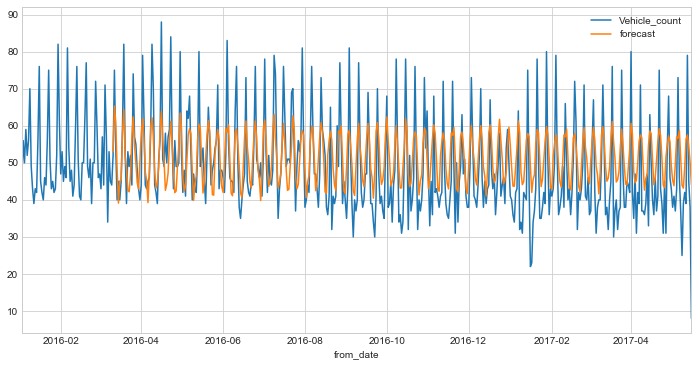

In [51]:
#bycountmunchen['forecast'] = results.predict(start = 1000, end = 1500, dynamic= True)  
auniquemunich[['Vehicle_count', 'forecast']].ix[-500:].plot(figsize=(12, 6))

In [52]:
model_mean_RMSEseasonal = RMSE(auniquemunich.VEHICLE_HAL_ID, auniquemunich.forecast)
model_mean_RMSEseasonal

10.491342299787906